In [ ]:
# get ic decay
from get_data import get_data,bars
from singletrader.processors.cs_processor import CsWinzorize,CsNeutrualize
from singletrader.shared.utility import save_pkl
from singletrader.factorlib import FactorEvaluation,summary_plot
import pandas as pd
import plotly.express as px
from plotly.figure_factory import create_table
import warnings
warnings.filterwarnings('ignore')
from singletrader.datasdk.qlib.base import MultiFactor
from singletrader.shared.utility import load_pkls
from singletrader.datasdk.sql.dataapi import get_index_cons
cs_neu = CsNeutrualize()


In [ ]:
fields = []
names = []

fields_bar = ['$close','$open','$high','$low','$avg','$volume','$circulating_market_cap','$turnover_ratio','$money','1/$pe_ratio']
names_bar = ['close','open','high','low','avg','volume','circulating_market_cap','turnover_ratio','money','ep']


fields_feature = ['Mean($close/Ref($close,1)-1,%d) / Std($close/Ref($close,1)-1,%d) / Mean($turnover_ratio,%d)' %(d,d,d) for d in (5,10,20)]
names_feature = ['fitness%d' %d for d in (5,10,20)]

fields = fields_bar + fields_feature
names =names_bar + names_feature

In [ ]:
# 获取数据
start_date = '2018-01-01'
end_date = '2023-03-31'
data = MultiFactor(name=names,field=fields,start_date=start_date,end_date=end_date)._data
index_cons = get_index_cons(start_date=start_date,end_date=end_date)


In [ ]:
import jqdatasdk as jq
import os
jq.auth(os.environ['JQ_USER'],os.environ['JQ_PASSWD'])
jq.get_concepts()

In [ ]:

fe = FactorEvaluation(bar_data=data[names_bar],factor_data=data[names_feature])
fe.get_summary(groups=10,base='close',holding_period=5,add_shift=0)


In [ ]:
report = fe.get_factor_detail_report(factor='fitness5',cost=0.00,universe=index_cons['zz1000'],holding_period=5,groups=10,base='close',total=False,add_shift=0,excess_return=True)
summary_plot(report)

In [44]:
from singletrader.shared.utility import load_pkl

d = load_pkl(r'D:\Edge浏览器下载\train.pkl/train.pkl')

In [46]:
d = d.set_index(['investment_id','time_id'])

In [79]:
d['f_2'].groupby(level=1).describe()

,count,mean,std,min,25%,50%,75%,max
time_id,,,,,,,,
0,2272.0,0.011063,0.997559,-1.995117,-0.615723,0.056091,0.618896,2.582031
1,2275.0,0.011192,0.994629,-2.011719,-0.612061,0.069397,0.619385,2.425781
2,2275.0,0.004032,0.997559,-2.119141,-0.620117,0.093201,0.608887,2.394531
3,2285.0,0.007130,0.995605,-2.531250,-0.533203,0.136230,0.604980,2.412109
4,2273.0,0.007195,0.996582,-1.839844,-0.697266,0.096741,0.653809,2.361328
...,...,...,...,...,...,...,...,...
1215,3432.0,0.006680,0.987793,-3.798828,-0.428894,0.001045,0.603760,3.781250
1216,3418.0,0.012123,0.983887,-3.720703,-0.394470,0.027901,0.580688,3.724609
1217,3420.0,0.004791,0.990723,-3.322266,-0.385864,0.072754,0.574341,3.611328


In [55]:
data['close'].groupby(level=0).count()*0.7

date
2018-01-02    2429.0
2018-01-03    2429.7
2018-01-04    2429.7
2018-01-05    2431.8
2018-01-08    2431.8
               ...  
2023-03-27    3458.7
2023-03-28    3459.4
2023-03-29    3461.5
2023-03-30    3461.5
2023-03-31    3462.2
Name: close, Length: 1274, dtype: float64

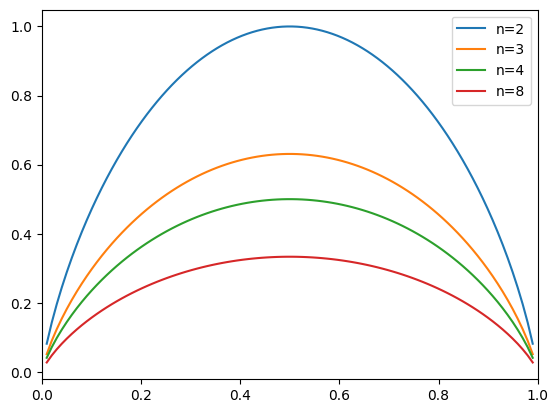

In [75]:
import numpy as np
import matplotlib.pyplot as plt
def np_log(base,x):
    return np.log(x)/np.log(base)

def entropy_plot(*args):
    x = np.linspace(0,1,100)
    for _ in args:
        y = -x * np_log(_,x) - (1-x) * np_log(_,1-x)
        plt.plot(x,y,label='n={}'.format(_))
    plt.xlim(0,1)
    plt.legend()
    plt.show()
entropy_plot(2,3,4,8)